**RESUMO DO NOTEBOOK**

Nesse notebook passamos pelos seguintes processos para chegar no resultado final: 
1. Importado as bibliotecas e o dataset.
2. O dataset teve o tipo de cada variável otimizado para melhorar o processamento e o tempo gasto.
3. Foi feita uma análise descritiva dos dados para entendermos melhor os dados existentes na base.
4. Foram tratadados alguns dados iguais com nomeclaturas diferentes e agrupados outras informações.
5. Foram transformados as informações categoricas em valores binários e para colunas com mais de dois valores categoricos foi utilizar a função One Hot Encoder da biblioteca do Sklearn Processing.
6. Foi utilizado o KNN Imputer para preencher as informações vazias que existiam no dataframe.
7. Foi realizado uma nova otimização dos tipos da base e gerado um arquivo excel final.

---
**ANÁLISES DESCRETIVAS GERAIS**

A base de dados contém 5.630 amostras e 20 variáveis para cada, e existem algumas dessas que tem dados faltantes.

**Cada observação representa um usuário único?** 

Cada observação representa um usuário único e não repetido.

**60,1% dos usuários são homens e a maioria são casdados e 1/3 solteiros**

**71% dos usuários preferem realizar as comprar pelo celular e utilizando cartões de crédito e débito.**

**Notebook e Acessórios, Celulares e Moda são as principais categorias preferidas pelos usuários no último mês.**

**Quantos cupons foram usados pelos usuários no último mês?** 

Cerca de 82% dos usuários utilizaram entre 0 a 2 cupons no úlimo mês para realizar compras nessa plataforma.

**Quantos pedidos foram feitos pelos usuário no último mês?** 

70% dos usuários fizeram no máximo dois pedidos até o momento.

**Quanto tempo faz desde a última compra feita?** 

A maior parte dos usuários retornaram faz pouco tempo para realizar uma compra.

**Houve crescimento percentual na quantidade de pedidos gerados?**

O mínimo de crescimento encontrado foi de 11% e o máximo foi 26%, mas a maior parte dos usuários aumentaram entre 12% a 15% a quantidade de compras feitas em comparação ao último ano.

**A quanto tempo os usuários estão nesse e-commerce?** 

Os usuários estão principalmente a menos de um mês ou no primeiro mês como clientes. 
- Parece que a flag se usuários é ou não um churner é baseada está no tempo que ele é usuário do e-commerce. Esse suspeita surgiu no gráfico acima, usuários com menos de 25 meses são possíveis churners e acima de 25 meses não são mais considerados churners.

**O quão distante fica o armazém dos produtos fica do domicílio dos usuários?** 

O armazém fica no máximo a 20km do domicílio da maior parte dos usuários. **(imagino que a métrica esteja em quilometros)**

**Quanto tempo é gasto no site/app?** A maioria dos usuários passam, aproximadamente, entre 2 a 4 horas. 

---
**DICIONÁRIO ATUALIZADO**
- **CustomerID:** Identificador único dos usuários.
- **Churn:** Sinalização se o usuário deixou de ser cliente ou não. 0 para não e 1 para sim.
- **Tenure:** Tempo que os usuários estão (ou estavam) como clientes da empresa.
- **PreferredLoginDevice:** Método preferencial para logar ao e-commerce. 0 para computer e 1 para mobile.
- **CityTier:**	O nível da cidade.
- **WarehouseToHome:** Distância entre o armazém e os domicílios.
- **Gender:** Gênero dos usuários. 0 para mulher e 1 para homem.
- **HourSpendOnApp:** Quantidade de horas gastas pelos usuários no app ou website do e-commerce.
- **NumberOfDeviceRegistered:**	Total de dispositivos registrado por um usuário.
- **SatisfactionScore:** Pontuação, entre 0 e 5, da satisfação dos usuários.
- **MaritalStatus:** Estado civil dos usuários. 0 para solteiro e 1 para casado.
- **NumberOfAddress:** Total de endereços registrados.
- **Complain:** Se houve reclamações no último mês. 0 para não e 1 para sim.
- **OrderAmountHikeFromlastYear:** Crescimento percentual de pedidos em relação ao último ano.
- **CouponUsed:** Quantidade de cupons utilizados no último mês.
- **OrderCount:** Total de pedidos feitos no último mês.
- **DaySinceLastOrder:** Quantidade de dias desde a última compra.
- **CashbackAmount:** Valor médio do cashback do último mês.

**Variáveis dummyzadas em colunas**
- **PreferredPaymentMode:** Formato de pagamento preferencial.
    - PreferredPaymentMode_Cash
    - PreferredPaymentMode_Credit
    - PreferredPaymentMode_Debit
    - PreferredPaymentMode_E wallet
    - PreferredPaymentMode_UPI
- **PreferedOrderCat:**	Categoria preferencial dos usuários do último mês.
    - PreferedOrderCat_Fashion
    - PreferedOrderCat_Grocery
    - PreferedOrderCat_Laptop & Accessory
    - PreferedOrderCat_Mobile
    - PreferedOrderCat_Others

# Tratativas Iniciais

**Importando bibliotecas e datasets**

In [1]:
from dtype_diet import report_on_dataframe, optimize_dtypes
from summarytools import dfSummary

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

In [2]:
url = 'https://raw.githubusercontent.com/PedroReste/repository_for_studies/main/churn_prediction_models/ecommerce_dataset_sem_tratamento.csv'
df = pd.read_csv(url, sep=';')

**Otimizando os tipos do dataset**

A biblioteca **dtype diet** é interessante para otimizar os tipos de cada variável para ficar mais rápido processar os dados.

Para essa base de dados não é tão necessário por conta de ser pequena, mas se tornar bastante interessante base de dados gigantes, economizando processamento, tempo e dinheiro.

Até sendo possível trazer primeiro uma pequena amostra dos dados, verificar os tipos ideais e depois reimportando os dados necessários com os tipos otimizados para gerar o dataframe.

In [3]:
optimized_df = report_on_dataframe(df, unit="MB")
df_optimized = optimize_dtypes(df, optimized_df)

print(f'Df original: {df.memory_usage(deep=True).sum()/1024/1014} MB')
print(f'Df otimizado, memória usada: {df_optimized.memory_usage(deep=True).sum()/1024/1014} MB')

Df original: 2.4223709858851086 MB
Df otimizado, memória usada: 0.1702916974852071 MB


In [4]:
#Os tipos originais de cada variável
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
#Os tipos otimizados de cada variável
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int32   
 1   Churn                        5630 non-null   int8    
 2   Tenure                       5366 non-null   float16 
 3   PreferredLoginDevice         5630 non-null   category
 4   CityTier                     5630 non-null   int8    
 5   WarehouseToHome              5379 non-null   float16 
 6   PreferredPaymentMode         5630 non-null   category
 7   Gender                       5630 non-null   category
 8   HourSpendOnApp               5375 non-null   float16 
 9   NumberOfDeviceRegistered     5630 non-null   int8    
 10  PreferedOrderCat             5630 non-null   category
 11  SatisfactionScore            5630 non-null   int8    
 12  MaritalStatus                5630 non-null   category
 13  Num

In [6]:
#Transformando o df otimizado no padrão
df = df_optimized

# Análise Descretiva

Antes de verificar algumas informações gerais sobre a base de dados, o dataset no [Kaggle]("https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction") já fornece uma descrição simples das variáveis.
- **CustomerID:** Identificador único dos usuários.
- **Churn:** Sinalização se o usuário deixou de ser cliente ou não. 0 para não e 1 para sim.
- **Tenure:** Tempo que os usuários estão (ou estavam) como clientes da empresa, provavelmente é meses pelos valores encontrados logo abaixo.
- **PreferredLoginDevice:** Método preferencial para logar ao e-commerce.
- **CityTier:**	O nível da cidade. **(na base original não informação geral sobre, é preciso investigar enteder melhor essa categorização)**
- **WarehouseToHome:** Distância entre o armazém e os domicílios.
- **PreferredPaymentMode:** Formato de Pagamento preferencial.
- **Gender:** Gênero dos usuários.
- **HourSpendOnApp:** Quantidade de horas gastas pelos usuários no app ou website do e-commerce.
- **NumberOfDeviceRegistered:**	Total de dispositivos registrado por um usuário.
- **PreferedOrderCat:**	Categoria preferencial dos usuários do último mês.
- **SatisfactionScore:** Pontuação, entre 0 e 5, da satisfação dos usuários.
- **MaritalStatus:** Estado civil dos usuários.
- **NumberOfAddress:** Total de endereços registrados.
- **Complain:** Se houve reclamações no último mês. 0 para não e 1 para sim.
- **OrderAmountHikeFromlastYear:** Crescimento percentual de pedidos em relação ao último ano.
- **CouponUsed:** Quantidade de cupons utilizados no último mês.
- **OrderCount:** Total de pedidos feitos no último mês.
- **DaySinceLastOrder:** Quantidade de dias desde a última compra.
- **CashbackAmount:** Valor médio do cashback do último mês.


In [7]:
#Sumário geral dos dados
dfSummary(df)

C:\Users\Computador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Computador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Computador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Computador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CustomerID[int32],Mean (sd) : 52815.5 (1625.4)min < med < max:50001.0 < 52815.5 < 55630.0IQR (CV) : 2814.5 (32.5),"5,630 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Churn[int8],Mean (sd) : 0.2 (0.4)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.4),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6tYN7t6aWV24/5RzXgtngS9XQ3X3tu/7XQihK1m+LMvB3ffEimfdeqLWIYRuHMc1xrg9sjil1EzT1M3zXJsZoeIpN1/9ZmYxxm0YhmPB/rZgBviGjylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIqN59APwf7t6aWV04fso5rz9dJFS8hLu3fd/vQghdyfyyLAd33/8UK6HiVeoQQjeO4xpj3B4ZTCk10zR18zzXZkao+H0xxm0YhmPBaHvtIh9TkECokECokECokECokECokECokECokECokHDXn6mUUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8AkonTn3BAu6AAAAAAElFTkSuQmCC"">",0(0.0%)
3,Tenure[float16],Mean (sd) : 10.2 (8.6)min < med < max:0.0 < 9.0 < 61.0IQR (CV) : 14.0 (1.2),36 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACOElEQVR4nO3czW7aQBSG4TMloQNUNogWdmzZZcGSi+jF9iLYch9IJjLCNQEhd1OqSPkB23Hjb/Q+68wki5dYxsfjiqIwoO2+fPYfANzi7toPOOd6ZtatuP+xKIq84lrgn3dDdc71xuPxzyiKRlU23+12j865X8SKuq79R+1GUTRaLpd5HMeHMhunaepXq9UoSZKumREqarl66Tczi+P4MJlMflfYv1dhDfACN1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQcNPr0lWdz+d7M4ucc1W34KQVmFmDoWZZdn86nR5ms1mn0+mUOrzigpNWcNFYqMfj8c57318sFofpdPpYdj0nreC5Ri/9ZmaDwaDqKStmnLSCv7iZggRChQRChQRChQRChQRChQRChQRChQRChYTGn0zVUXOohYGWgLQ21LpDLQy0hKW1odYZamGgJTytDfWixlALAy0B4WYKEggVEggVEggVEggVEggVElr/9VRVvKodliBD5VXt8AQZKq9qhyfIUC94VTsc3ExBAqFCQtCX/jqYhW0XQn0Fs7DtQ6ivYBa2fQj1HczCtgc3U5BAqJBAqJBAqJBAqJBAqJDA11MN4KnWxyPUD8ZTrWbcFGqapr7sxvv93puZZVnmN5tN/3+u/8zfvd1uv3nv+/P53A2Hw6cya/M8/7per38kSfLdObcrszYAT0VRvPnB/gPF+BQZ3sJuZAAAAABJRU5ErkJggg=="">",264(4.7%)
4,PreferredLoginDevice[category],1. Mobile Phone2. Computer3. Phone,"2,765 (49.1%)1,634 (29.0%)1,231 (21.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bQYraABiG4T9Fhs4mQQQP4yF62B4itxExi84wm3TRVXd1Cl/yO89zAX/kRYn4Deu6FiR82/oAvo6hql6r6mXrQxr5WNf1besjOjqcTqcf4zgetz6ki2VZbsMw/BTc4w7jOB4vl8vbNE3vWx+zd/f7/fs8z8fr9fpSVWJ70KGqapqm9/P5/GvrY5p43fqArjwgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiPmUPXnf1pbH9KB9+n/HJZluc3zfCz/0/ony7Lcqupj6zs6skF4nA3CJw2mfKR0/WTz6dJQy3WVhVNP7dZVFk59dV1XeXJuyI+6xIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ihpt67qdCt/a7musnDqyQaBGOsqYjwgELOnr1FfjU9uN1M+87znt4spn3ne17CnKV+bn174HA8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IjZxZRv69cnYzdTPvO852eDQIwpHzG/AUq8o0re0pziAAAAAElFTkSuQmCC"

----------------------------
**Essa biblioteca ainda está sendo adaptada do R para o Python, mas já ajuda para olhar estatística descretivas gerais.**

Características interessantes que esse sumário já proporciona:

A base de dados contém 5.630 amostras e 20 variáveis para cada, e existem algumas dessas que tem dados faltantes.
- O ID por usuário nessa base é único para todas as linhas, quer dizer que não temos usuários repetidos e não está faltando em nenhuma linha. É possível que seja uma tabela de usuários e não de pedidos feitos.
- Cerca de 71% dos usuários preferem comprar pelo celular.
	- Considerando que precisamos ajustar e agrupar o "mobile phone" e "phone" no mesmo padrão.
- Majoritariamente é preferível pagar com o cartões de crédito e débito.
  - Podemos entrar em detalhes depois para saber o que significa as outras formas de pagamento existentes na base.
- 60,1% dos usuários são homens.
- Notebook e Acessórios, Celulares e Moda são as principais categorias preferidas pelos usuários no último mês.
- Os usários, majoritariamente, são casados e 1/3 solteiros. 
  - Aqui é possível agrupar solterios e divorciados caso não tenham tanta distinção.
--------------------
**Métricas que faltaram observar**
- Churn
- Tenure
- CityTier
- WarehouseToHome
- HoursSpendOnApp
- NumberOfDeviceRegistered
- Satisfaction Score
- NumberOfAddress
- Complain
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
-----------------
**Dados faltantes por variável**
- Tenure: 4,7%
- WarehouseToHome: 4,5%
- OrderAmountHikeFromlastYear: 4,7%
- CouponUsed: 4,5%
- OrderCount: 4,6%
- DaySinceLastOrder: 5,5%
-----------------

**SE REMOVESSEMOS TODAS AS LINHAS QUE TEM UM VALOR VAZIO?**

In [8]:
#Criando um df sem dados faltantes e comparando com a base de dados original
df_sem_na = df.dropna()
print(f"Quantidade de linhas da base original: {df.shape[0]}")
print(f"Quantidade de linhas da base sem dados faltantes: {df_sem_na.shape[0]}")
print(f"A base de dados sem dados faltantes representa {round((df_sem_na.shape[0]/df.shape[0]) * 100, 1)}% da base original")
print(f"Perderiamos {100 - round((df_sem_na.shape[0]/df.shape[0]) * 100, 1)}% das observações da base original")

Quantidade de linhas da base original: 5630
Quantidade de linhas da base sem dados faltantes: 3774
A base de dados sem dados faltantes representa 67.0% da base original
Perderiamos 33.0% das observações da base original


Não é ideal removermos essas linhas todas para observar os dados, ainda mais porque estamos falando de usuários únicos de uma base de e-commerce.

Podemos pensar posteriormente uma estratégia para repor esses dados, porque exisem métricas que são interessantes utilizarmos, ainda mais no contexto de uma base de dados pensada para modelos de churn.

**OUTRAS ANÁLISES DESCRETIVAS**

Aplicando as análises descretivas com gráficos para auxiliar na visualização dos dados.

Text(0.5, 0, '')

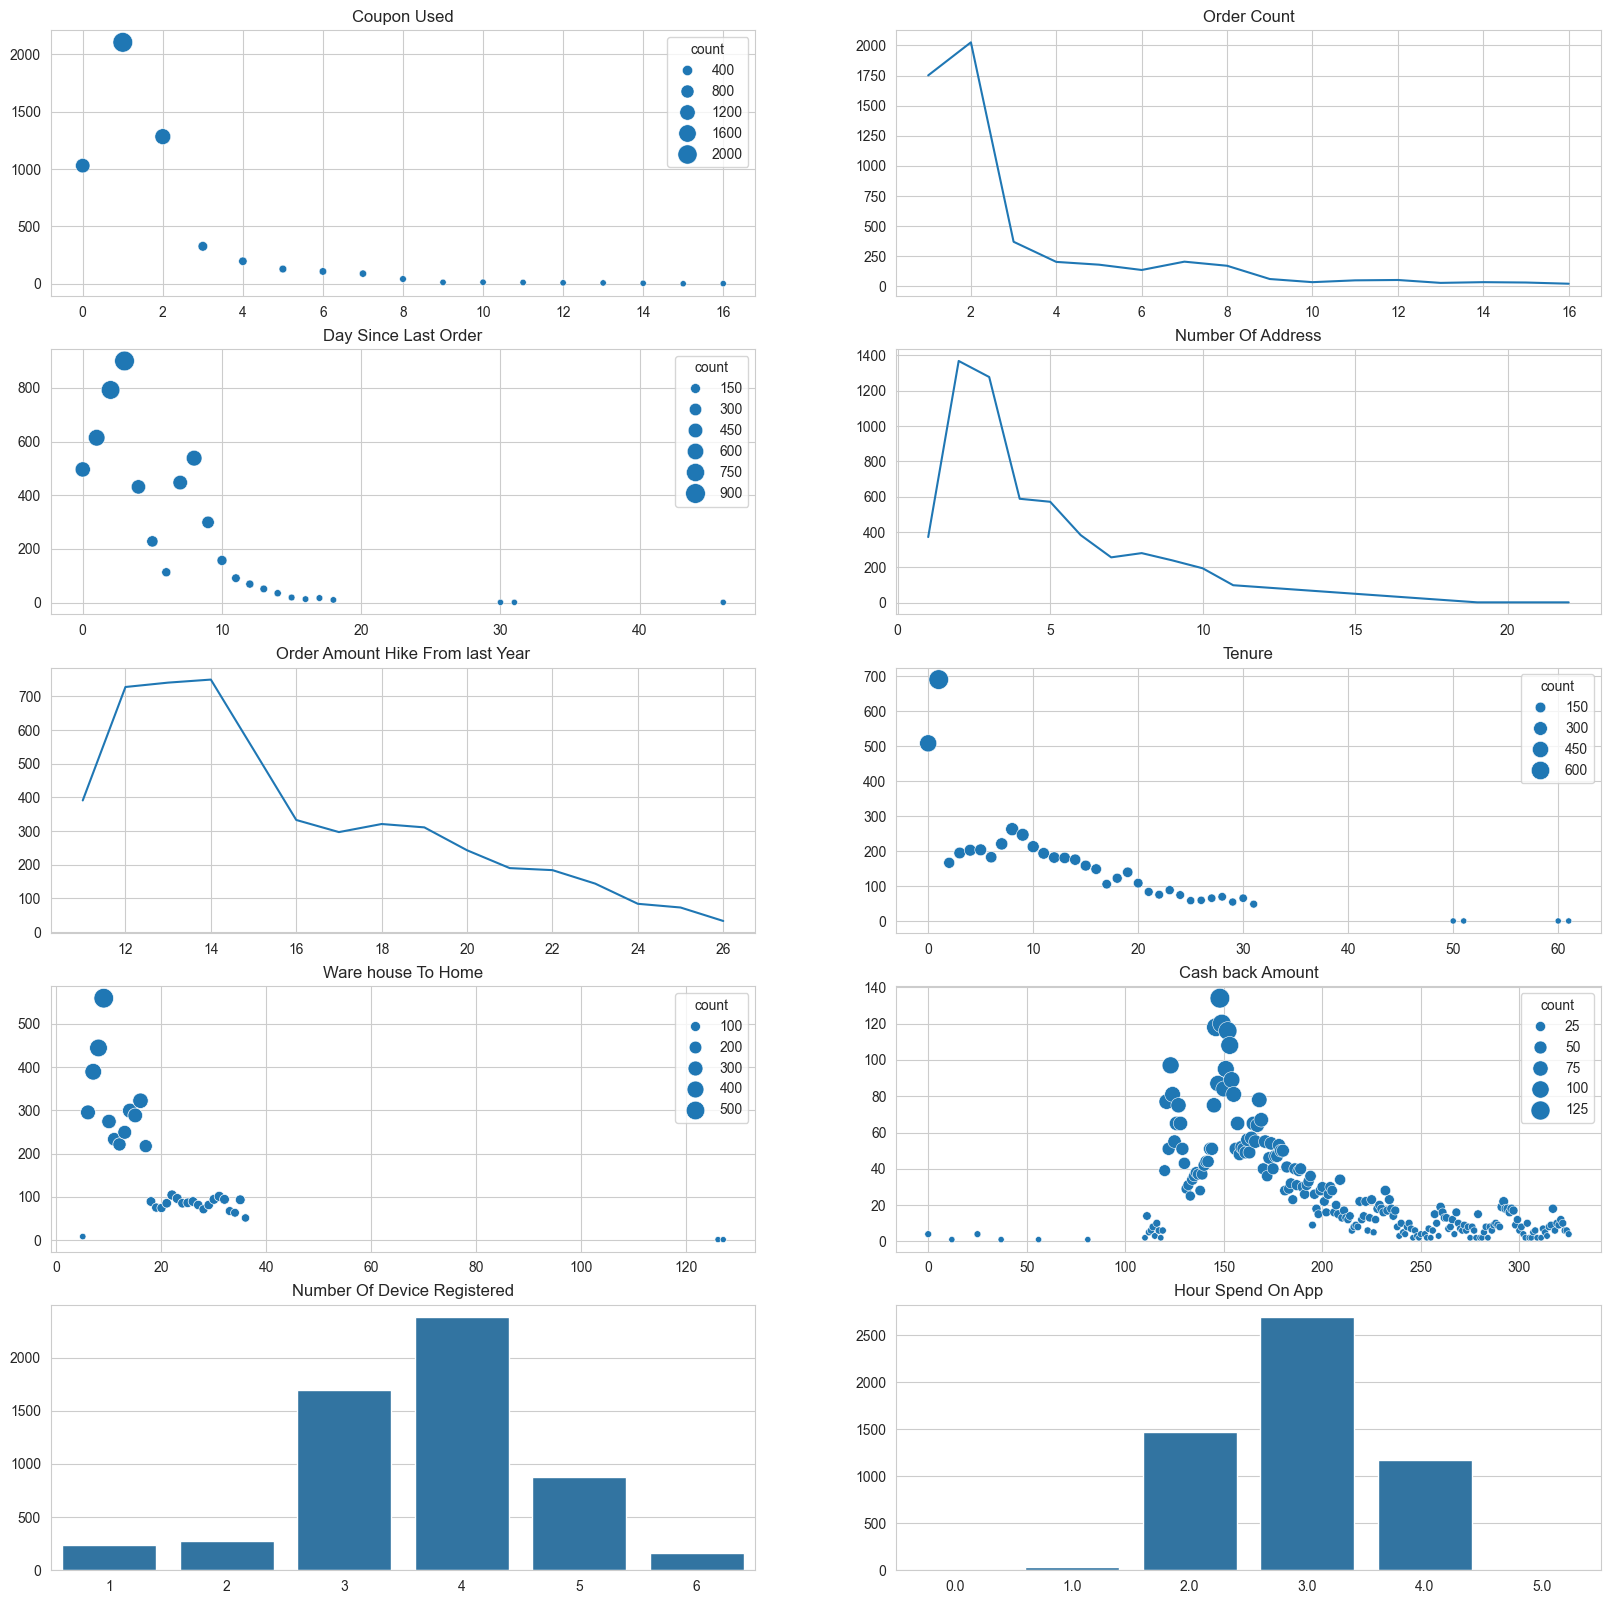

In [9]:
#Gerando gráficos com um subplot para não precisar criar diversas células do notebook para cada gráfico

sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

var = df['CouponUsed'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[0, 0])
axes[0, 0].set_title("Coupon Used")
axes[0, 0].set_xlabel("")

var = df['OrderCount'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[0, 1])
axes[0, 1].set_title("Order Count")
axes[0, 1].set_xlabel("")

var = df['DaySinceLastOrder'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[1, 0])
axes[1, 0].set_title("Day Since Last Order")
axes[1, 0].set_xlabel("")

var = df['NumberOfAddress'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[1, 1])
axes[1, 1].set_title("Number Of Address")
axes[1, 1].set_xlabel("")

var = df['OrderAmountHikeFromlastYear'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[2, 0])
axes[2, 0].set_title("Order Amount Hike From last Year")
axes[2, 0].set_xlabel("")

var = df['Tenure'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[2, 1])
axes[2, 1].set_title("Tenure")
axes[2, 1].set_xlabel("")

var = df['WarehouseToHome'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[3, 0])
axes[3, 0].set_title("Ware house To Home")
axes[3, 0].set_xlabel("")

var = df['CashbackAmount'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[3, 1])
axes[3, 1].set_title("Cash back Amount")
axes[3, 1].set_xlabel("")

var = df['NumberOfDeviceRegistered'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[4, 0])
axes[4, 0].set_title("Number Of Device Registered")
axes[4, 0].set_xlabel("")

var = df['HourSpendOnApp'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[4, 1])
axes[4, 1].set_title("Hour Spend On App")
axes[4, 1].set_xlabel("")

In [10]:
#Relizando alguns calculos para algumas métricas
print(f"Em média, foram {round(df['CouponUsed'][df['CouponUsed'].notnull() == True].mean(), 0)} cupons usados por usuário (desconsiderando as linhas vazias no cálculo).")
var = df['CouponUsed'].sort_values().value_counts(sort=False)
print(f"Participação percentual da quantidade de cupons foram usados pelos usuários: {((var / var.sum()) * 100).round(2)}")

Em média, foram 2.0 cupons usados por usuário (desconsiderando as linhas vazias no cálculo).
Participação percentual da quantidade de cupons foram usados pelos usuários: CouponUsed
0.0     19.17
1.0     39.17
2.0     23.87
3.0      6.08
4.0      3.67
5.0      2.40
6.0      2.01
7.0      1.66
8.0      0.78
9.0      0.24
10.0     0.26
11.0     0.22
12.0     0.17
13.0     0.15
14.0     0.09
15.0     0.02
16.0     0.04
Name: count, dtype: float64


In [11]:
print(f"Em média, foram feitos {round(df['OrderCount'][df['OrderCount'].notnull() == True].mean(), 0)} pedidos por usuário (desconsiderando as linhas vazias no cálculo).")
var = df['OrderCount'].sort_values().value_counts(sort=False)
print(f"Participação percentual da quantidade de pedidos pelos usuários: {((var / var.sum()) * 100).round(2)}")

Em média, foram feitos 3.0 pedidos por usuário (desconsiderando as linhas vazias no cálculo).
Participação percentual da quantidade de pedidos pelos usuários: OrderCount
1.0     32.59
2.0     37.70
3.0      6.91
4.0      3.80
5.0      3.37
6.0      2.55
7.0      3.83
8.0      3.20
9.0      1.15
10.0     0.67
11.0     0.95
12.0     1.01
13.0     0.56
14.0     0.67
15.0     0.61
16.0     0.43
Name: count, dtype: float64


Text(0.5, 0, '')

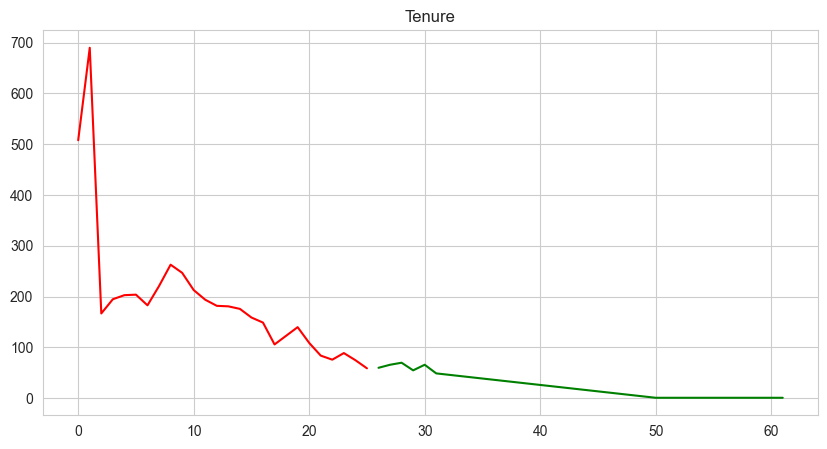

In [12]:
#Gerando um gráfico a parte para a variável Tenure, segmentando pela variável Churn
fig, axes = plt.subplots(figsize=(10, 5))

sns.set_style("whitegrid")
var = df['Tenure'].sort_values().value_counts(sort=False)[df["Churn"] == 0]
sns.lineplot(x= var.index, y=var.values, color="green")

var = df['Tenure'].sort_values().value_counts(sort=False)[df["Churn"] == 1]
sns.lineplot(x= var.index, y=var.values, color="red")

axes.set_title("Tenure")
axes.set_xlabel("")

Pontos interessantes apresentados através dos gráficos e alguns cálculos feitos:

**Quantos cupons foram usados pelos usuários no último mês?** 
- Cerca de 82% dos usuários utilizaram entre zero a dois cupons no úlimo mês para realizar compras nessa plataforma.
- Detalhando que 40% dos usuários utilizaram 01 cupom nas sua compras no último mês, 24% usaram 2 e 20% usaram nenhum cupon.
    - Talvez seja interessante de gerar um gráfico de dispersão para acompanhar a quantidade pedidos feitos (OrderCount) com a quantidade de cupons usados (CuponUsed).

**Quantos pedidos foram feitos pelos usuário no último mês?**
- Dentro desse recorte dos dados, 70% dos usuários fizeram no máximo dois pedidos até o momento, 33% fizeram apenas um pedido e 38% fizeram dois, aproximadamente.

**Quanto tempo faz desde a última compra feita?**
- A maior parte dos usuários retornaram faz pouco tempo para realizar uma compra.
- Infelizmente não é possível saber quanto tempo se passou entre o pedido mais recente e o penúltimo pedido para entender o tempo de retorno.
    - Talvez seja interessante fazer um gráfico de dispersão para entender a interação dessa váriavel com OrderCount, CuponUsed e Churn.

**Houve crescimento percentual na quantidade de pedidos gerados?**
- O mínimo de crescimento encontrado foi de 11% e o máximo foi 26%.
- No entanto, a maior parte dos usuários aumentaram entre 12% a 15% a quantidade de compras feitas em comparação ao último ano.
    - Aqui também seria interessante separar esses usuários dos demais para entender o porque dessa diferença.

**A quanto tempo os usuários estão nesse e-commerce?**
- Desconsiderando se os usuários são churners ou não, os usuários estão principalmente a menos de um mês ou no primeiro mês como clientes. 
- Considerando que 58% dos usuários estão, no máximo a 10 meses como clientes.

- Parece que a flag se usuários é ou não um churner é baseada está no tempo que ele é usuário do e-commerce. Esse suspeita surgiu no gráfico acima, usuários com menos de 25 meses são possíveis churners e acima de 25 meses não são mais considerados churners.
    - Verificar quais são as direnças entre ambas as bases seja interressante, até para entender se existem outras flags além do tempo como cliente.

**O quão distante fica o armazém dos produtos fica do domicílio dos usuários?**
- O armazém fica no máximo a 20km do domicílio da maior parte dos usuários. **(imagino que a métrica esteja em quilometros)**
- Nesse base tem alguns outliers que estão bastante distantes do armazém, que poderiamos remover para gerar modelos de previsão.

**Quanto tempo é gasto no site/app?**
- A maioria dos usuários passam, aproximadamente, entre 2 a 4 horas. 
    - Será que essa quantidade de tempo é relevante para quantidade de pedidos feitas na base e consequentemente para definir os churners e não churners?

<Axes: xlabel='DaySinceLastOrder', ylabel='CouponUsed'>

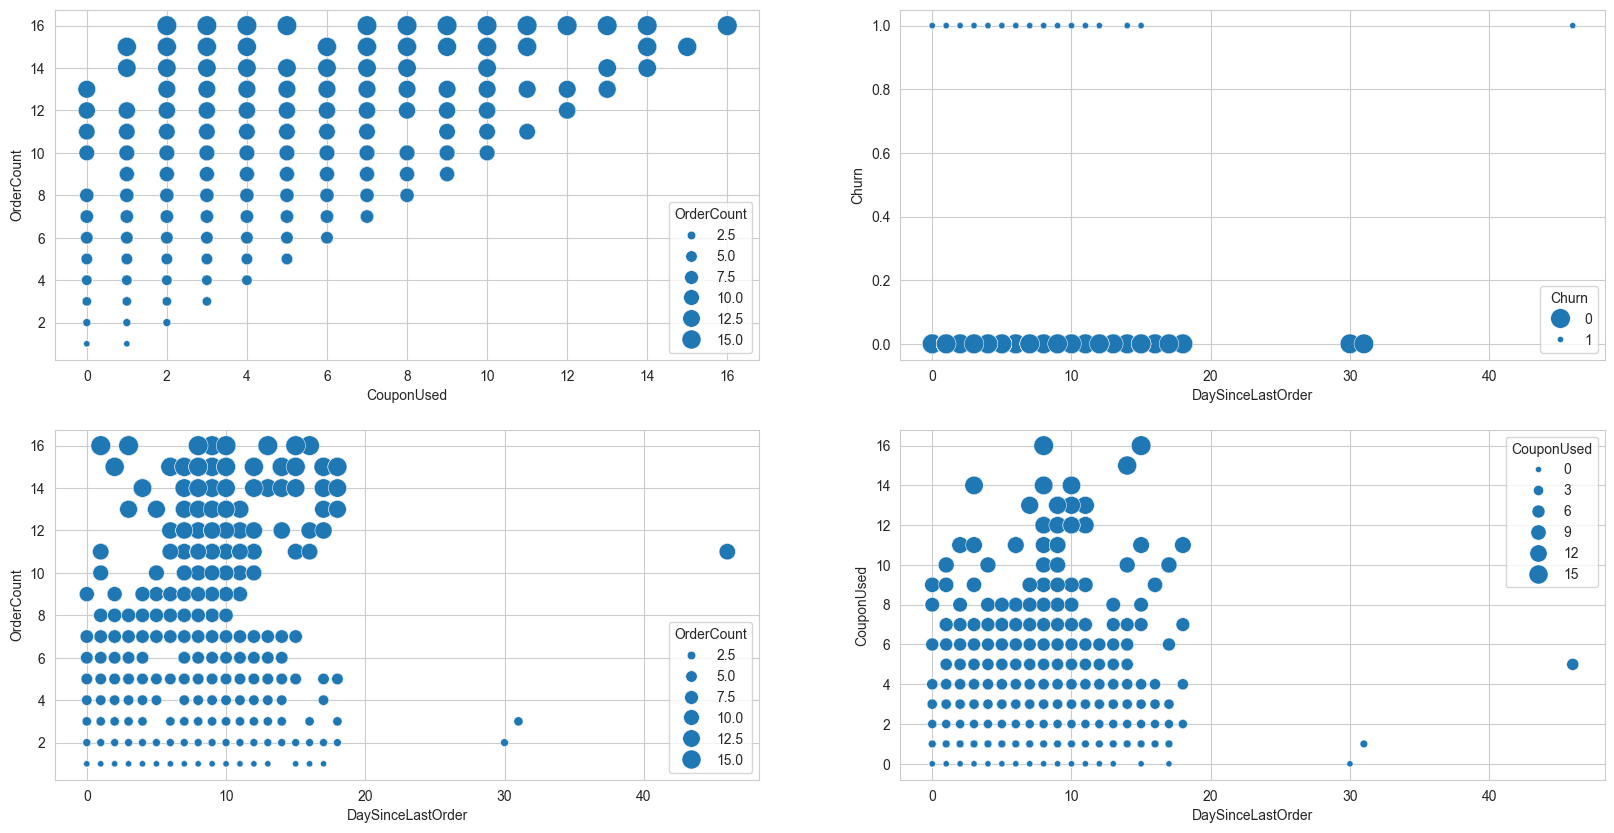

In [13]:
#Gerando mais gráficos com as sugestões acima
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.scatterplot(x=df['CouponUsed'], y=df['OrderCount'], size=df['OrderCount'], sizes=(20, 200), ax=axes[0, 0])

sns.scatterplot(x=df['DaySinceLastOrder'], y=df['Churn'], size=df['Churn'], sizes=(20, 200), ax=axes[0, 1])

sns.scatterplot(x=df['DaySinceLastOrder'], y=df['OrderCount'], size=df['OrderCount'], sizes=(20, 200), ax=axes[1, 0])

sns.scatterplot(x=df['DaySinceLastOrder'], y=df['CouponUsed'], size=df['CouponUsed'], sizes=(20, 200), ax=axes[1, 1])


Parece que as sugestões de gerar gráficos de dispersão não gerou nenhuma informação tão relevante no momento.

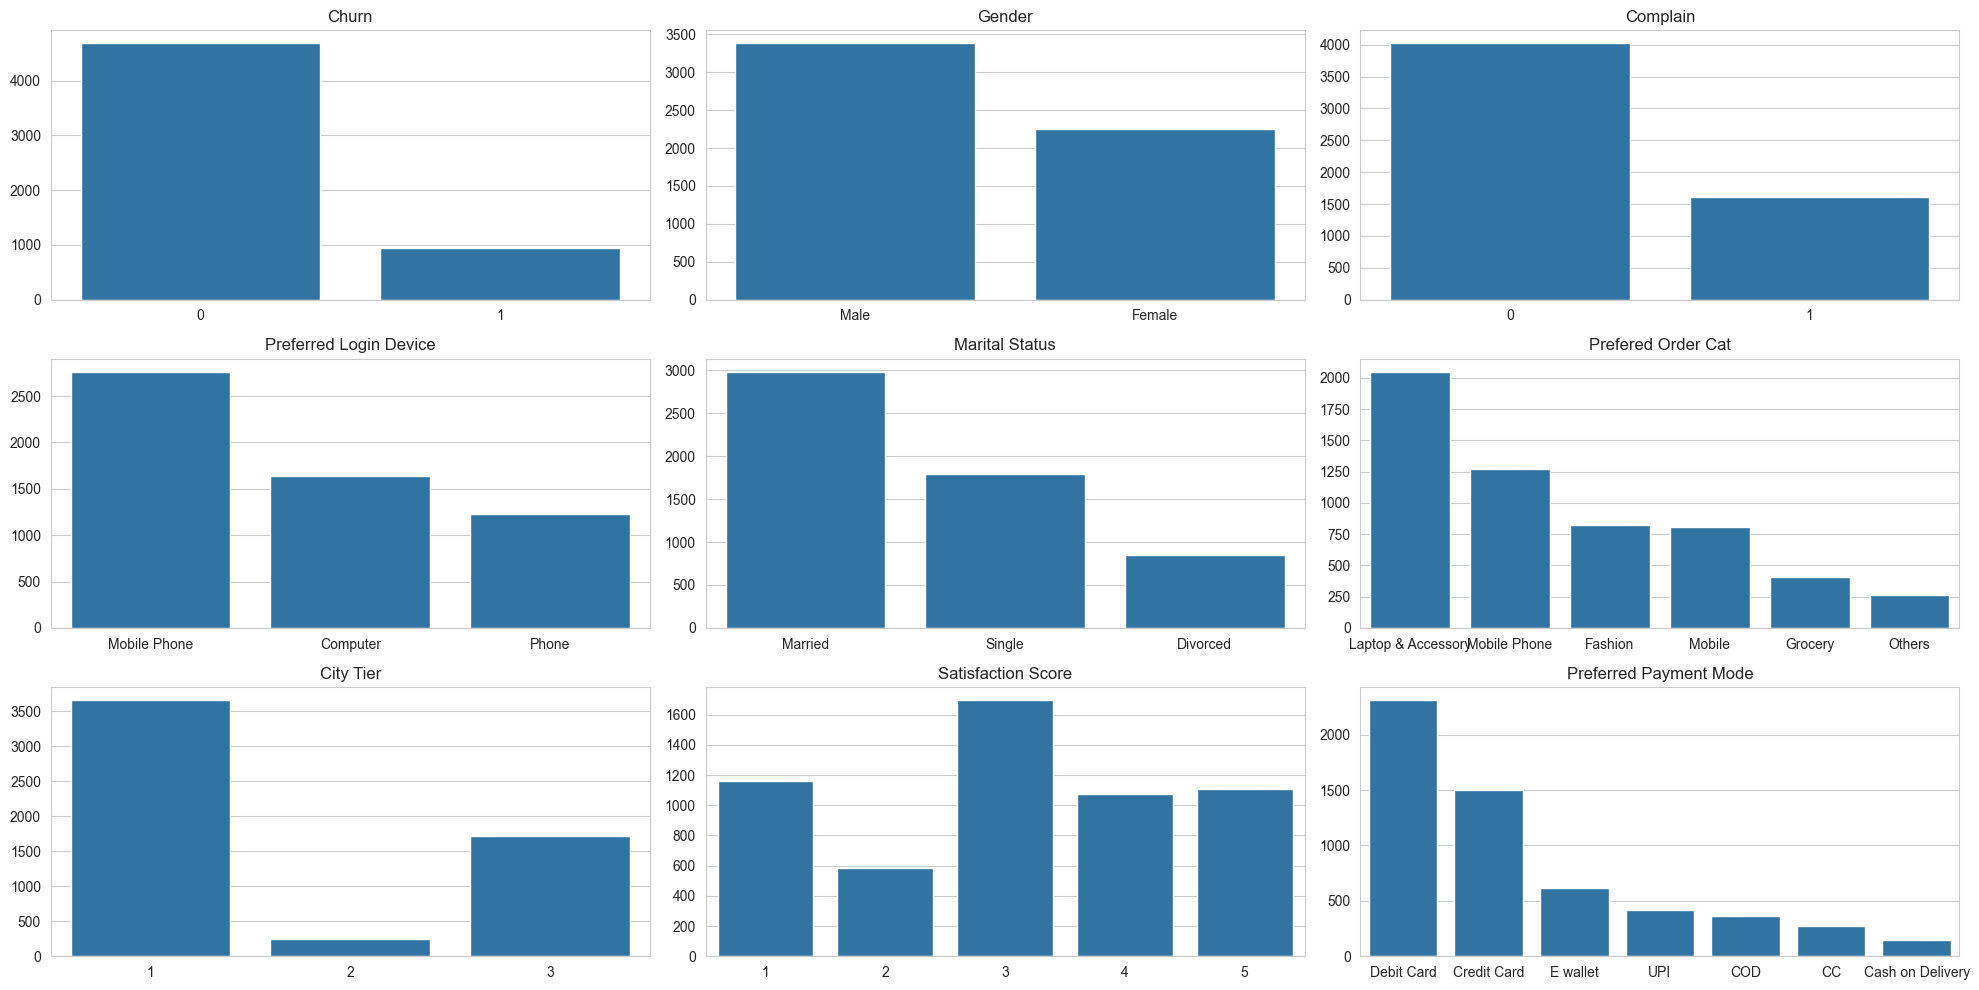

In [14]:
#Gerando mais gráficos para as váriaveis que faltaram ser observadas
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

var = df['Churn'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[0, 0])
axes[0, 0].set_title("Churn")
axes[0, 0].set_xlabel("")

var = df['Gender'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[0, 1])
axes[0, 1].set_title("Gender")
axes[0, 1].set_xlabel("")

var = df['Complain'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[0, 2])
axes[0, 2].set_title("Complain")
axes[0, 2].set_xlabel("")

var = df['PreferredLoginDevice'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[1, 0])
axes[1, 0].set_title("Preferred Login Device")
axes[1, 0].set_xlabel("")

var = df['MaritalStatus'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[1, 1])
axes[1, 1].set_title("Marital Status")
axes[1, 1].set_xlabel("")

var = df['PreferedOrderCat'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[1, 2])
axes[1, 2].set_title("Prefered Order Cat")
axes[1, 2].set_xlabel("")

var = df['CityTier'].value_counts()
sns.barplot(x= var.index, y=var.values, ax=axes[2, 0])
axes[2, 0].set_title("City Tier")
axes[2, 0].set_xlabel("")

var = df['SatisfactionScore'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[2, 1])
axes[2, 1].set_title("Satisfaction Score")
axes[2, 1].set_xlabel("")

var = df['PreferredPaymentMode'].sort_values().value_counts(ascending=False)
sns.barplot(x= var.index, y=var.values, order=var.index, ax=axes[2, 2])
axes[2, 2].set_title("Preferred Payment Mode")
axes[2, 2].set_xlabel("")

plt.tight_layout()

**Retomando alguns pontos que já tinhamos verificado anteriormente sobre essas variáveis:**

- Cerca de 71% dos usuários preferem comprar pelo celular.
	- Considerando que precisamos ajustar e agrupar o "mobile phone" e "phone" no mesmo padrão.
- Majoritariamente é preferível pagar com o cartões de crédito e débito.
  - Podemos entrar em detalhes depois para saber o que significam as outras formas existentes.
- 60,1% dos usuários são homens.
- Notebook e Acessórios, Celulares e Moda são a principais categorias preferidas pelos usuários no último mês.
- Os usários são majoritariamente casados e 1/3 solteiros. Aqui é possível agrupar solterios e divorciados caso não tenham tanta distinção.

**Outras informações que podemos verificar:**
- City Tier, seria interessante segmentar pelos níveis para verificar se as bases são muito distintas.

- Sobre a variável **Preferred Payment Mode**, que tinhamos pontuado anteriormente, será necessário tratar os dados porque temos categoria que na verdade são as mesmas informações.
  - Credit Card e CC significam a mesma coisa.
  - Cash On Delivery e CC significam a mesma coisa. Nesse caso, acaba não sendo tão comum em e-commerces daqui, mas é o ato de pagar na entrega do produto. Parece mais semelhante a possibilidade pagar o seu lache na entrega do iFood e correlatos.
  - UPI (unified payment interface), pelas descrições que encontrei, parace um tipo de PIX na Índia. Sim, a base não tinha o indicativo de onde era, parece que se trata de um e-commerce indiano.
  - E-wallet é tipo uma carteira virtual, sendo possível pagar no crédito e no débito virtualmente.

**Será que é interessante agrupar solteiros e divorciados?**

In [15]:
#Criando dois dataframes separados por usuários identificados como solteiros e como divorciados
solteiros = df[df['MaritalStatus'] == "Single"]
divorciados = df[df['MaritalStatus'] == "Divorced"]

#Comparando métricas descritivas para entender se é possível agrupar solteiros e divorciados

metrica_de_comparacao = "mean" #Aqui podemos mudar a métrica da comparação

print("Comparação de estatísticas entre solteiros e divorciados:")
comparison_stats = pd.DataFrame({
    'Solteiros': solteiros.describe().loc[metrica_de_comparacao], 
    'Divorciados': divorciados.describe().loc[metrica_de_comparacao],
    'Diferença': solteiros.describe().loc[metrica_de_comparacao] - divorciados.describe().loc[metrica_de_comparacao]
})
print(comparison_stats)

Comparação de estatísticas entre solteiros e divorciados:
                                Solteiros   Divorciados   Diferença
CustomerID                   52796.340757  51885.488208  910.852550
Churn                            0.267261      0.146226    0.121034
Tenure                           8.664062     11.007812   -2.343750
CityTier                         1.682628      1.686321   -0.003693
WarehouseToHome                 15.328125     15.492188   -0.164062
HourSpendOnApp                   2.880859      2.955078   -0.074219
NumberOfDeviceRegistered         3.753898      3.674528    0.079369
SatisfactionScore                3.027840      3.257075   -0.229236
NumberOfAddress                  4.175947      4.193396   -0.017450
Complain                         0.283964      0.292453   -0.008488
OrderAmountHikeFromlastYear     15.734375     15.593750    0.140625
CouponUsed                       1.646484      1.909180   -0.262695
OrderCount                       2.761719      3.167969   

Pelas informações obtidas pelo função **describe()**, parece que não há tanta diferença entre solteiros e casados nesse caso.

# Tratamento de dados pós análises descretivas

**Transformando algumas informações para agrupar dados**

Nessa primeira parte pós a análise descretiva dos dados, será feito um tratamento de agrupar algumas informações categoricas que são semelhantes ou que estão com nomes diferentes.

Tratamentos necessários por váriavel:

**Preferred Login Device**
- Agrupar mobile phone e phone como mobile.

**Preferred Order Cat**
- Agrupar mobile e mobile phone como mobile.

**Preferred Payment Mode**
- Agrupar Credit Card e CC.
- Agrupar Cash On Delivery e COD.

**MarigeStatus**
- Agrupar solteiros e divorciados.

In [16]:
#Criando um dicionário e substituindo as informações
var = {"Mobile Phone" : "Mobile",
       "Phone" : "Mobile"}
df["PreferredLoginDevice"].replace(var, inplace= True)

var = {"Mobile Phone" : "Mobile"}
df["PreferedOrderCat"].replace(var, inplace= True)

var = {"Debit Card" : "Debit",
       "Credit Card" : "Credit",
       "CC" : "Credit",
       "Cash on Delivery" : "Cash",
       "COD" : "Cash"}
df["PreferredPaymentMode"].replace(var, inplace= True)

var = {"Divorced" : "Single"}
df["MaritalStatus"].replace(var, inplace= True)

C:\Users\Computador\AppData\Local\Temp\ipykernel_1612\4060346003.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PreferredLoginDevice"].replace(var, inplace= True)
C:\Users\Computador\AppData\Local\Temp\ipykernel_1612\4060346003.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["PreferredLoginDevice"].r

**Como preencher os dados faltantes?**

Como tinhamos visto antes, se removermos todas as linhas que falta alguma informação, perderiamos cerca de 33% das linhas da base original.

Essa opção acaba não sendo a ideal, porque estamos tratando de usuários únicos dentro de um e-commerce e não podemos ignorar 33% desses usuários únicos porque faltou informação em alguma coluna sobre esse usuário.
Além de que vamos tratar esses dados para gerar modelos de churn, que é a proposta da base de dados oriunda do Kaggle.

**Relembrando as variáveis que tem dados faltantes:**
- Tenure: 4,7%
- WarehouseToHome: 4,5%
- OrderAmountHikeFromlastYear: 4,7%
- CouponUsed: 4,5%
- OrderCount: 4,6%
- DaySinceLastOrder: 5,5%

---
Para preencher os valores vazios dessas 6 colunas, vou utilizar o **KNN Imputer** para prever quais seriam os valores mais próximos de acordo com as características da base.

No entanto, é preciso primeiro transformar antes as variáveis categoricas em números para serem reconhecidas pelo **KNN Imputer**.

**(Ao final do documento será feito uma atualização do dicionário das váriaveis para melhor entendimento)**

In [17]:
var = {"Computer": 0,
       "Mobile" : 1}
df["PreferredLoginDevice"].replace(var, inplace= True)

var = {"Female": 0,
       "Male" : 1}
df["Gender"].replace(var, inplace= True)

var = {"Single": 0,
       "Married" : 1}
df["MaritalStatus"].replace(var, inplace= True)

C:\Users\Computador\AppData\Local\Temp\ipykernel_1612\774352840.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PreferredLoginDevice"].replace(var, inplace= True)
C:\Users\Computador\AppData\Local\Temp\ipykernel_1612\774352840.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Preferred

Para as variáveis **PreferredPaymentMode** e **PreferedOrderCat** não será possível apenas fazer uma troca númerica que fizemos para as demais variáveis categoricas.

Nesse caso, vamos utilizar a função **One Hot Encoder** do **Sklearn Preprocessing** para transformar em algumas colunas binárias essas categorias para utilizarmos no KNN Imputer e não perdemos essas informações.

In [18]:
#Salvando a função em uma variável
encoder = OneHotEncoder(sparse_output=False)

#Selecionando as colunas para transformar em colunas binárias
cols_to_encode = ['PreferredPaymentMode', 'PreferedOrderCat']

#Ajustando e transformando os dados selecionados com OneHotEncoder
encoded_data = encoder.fit_transform(df[cols_to_encode])

#Obtendo os nomes das novas colunas binárias geradas a partir das categorias únicas
encoded_cols = encoder.get_feature_names_out(cols_to_encode)

#Criando um DataFrame com os dados codificados
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)

#Concatenando o novo DataFrame codificado com as colunas não categóricas do DataFrame original
df_codificado = pd.concat([df.drop(cols_to_encode, axis=1), encoded_df], axis=1)

O **One Hot Encoder** é interessante porque temos poucas categorias nessas duas variáveis e não acaba gerando tantas colunas, que poderia gerar problemas de dimensionalidade, afetando os modelos de previsão futuros e a imputação de dados faltantes com o **KNN Imputer**.

Abaixo tem o uso do **KNN Imputer** para preencher os dados vazios do dataframe, verificar se funcionou e transformando em inteiros.

In [19]:
# Suponha que df_encoded tenha alguns valores faltantes após algumas operações
imputer = KNNImputer(n_neighbors=5)

# Aplica o KNN Imputer
df_imputed = pd.DataFrame(imputer.fit_transform(df_codificado), columns=df_codificado.columns)

In [20]:
#Verificando se ficou tudo certinho
df_imputed.isna().sum()

CustomerID                             0
Churn                                  0
Tenure                                 0
PreferredLoginDevice                   0
CityTier                               0
WarehouseToHome                        0
Gender                                 0
HourSpendOnApp                         0
NumberOfDeviceRegistered               0
SatisfactionScore                      0
MaritalStatus                          0
NumberOfAddress                        0
Complain                               0
OrderAmountHikeFromlastYear            0
CouponUsed                             0
OrderCount                             0
DaySinceLastOrder                      0
CashbackAmount                         0
PreferredPaymentMode_Cash              0
PreferredPaymentMode_Credit            0
PreferredPaymentMode_Debit             0
PreferredPaymentMode_E wallet          0
PreferredPaymentMode_UPI               0
PreferedOrderCat_Fashion               0
PreferedOrderCat

Como todas as variáveis não tinham números decimais, vamos transforma-las em inteiros para otimizar o processamento da base de dados.

In [21]:
columns = df_imputed.columns
for col in columns:
    df_imputed[col] = df_imputed[col].astype("int")

Após a todo processo feito nesse notebook para entender os dados e tratamentos feitos, vamos rodar novamente a biblioteca **dtype diet** para realizar uma última otimização para termos um dataframe pronto para rodar modelos de previsão.

In [22]:
optimized_df = report_on_dataframe(df_imputed, unit="MB")
df_optimized = optimize_dtypes(df_imputed, optimized_df)

print(f'Df original: {df_imputed.memory_usage(deep=True).sum()/1024/1014} MB')
print(f'Df otimizado, memória usada: {df_optimized.memory_usage(deep=True).sum()/1024/1014} MB')

Original df memory: 0.6074064657297831 MB
Propsed df memory: 0.6074064657297831 MB


In [23]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   CustomerID                           5630 non-null   int32
 1   Churn                                5630 non-null   int32
 2   Tenure                               5630 non-null   int32
 3   PreferredLoginDevice                 5630 non-null   int32
 4   CityTier                             5630 non-null   int32
 5   WarehouseToHome                      5630 non-null   int32
 6   Gender                               5630 non-null   int32
 7   HourSpendOnApp                       5630 non-null   int32
 8   NumberOfDeviceRegistered             5630 non-null   int32
 9   SatisfactionScore                    5630 non-null   int32
 10  MaritalStatus                        5630 non-null   int32
 11  NumberOfAddress                      5630 non-null   int

In [24]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   CustomerID                           5630 non-null   int32
 1   Churn                                5630 non-null   int32
 2   Tenure                               5630 non-null   int32
 3   PreferredLoginDevice                 5630 non-null   int32
 4   CityTier                             5630 non-null   int32
 5   WarehouseToHome                      5630 non-null   int32
 6   Gender                               5630 non-null   int32
 7   HourSpendOnApp                       5630 non-null   int32
 8   NumberOfDeviceRegistered             5630 non-null   int32
 9   SatisfactionScore                    5630 non-null   int32
 10  MaritalStatus                        5630 non-null   int32
 11  NumberOfAddress                      5630 non-null   int

Após a otimização, um datafrme proto para ser utilizado em previsões de dados.

In [26]:
df_optimized.to_excel("ecommerce_database_kaggle_treated.xlsx", index= False)